In [4]:
from scipy.ndimage import gaussian_filter
import numpy as np
a = np.arange(50, step=2).reshape((5,5))
a, gaussian_filter(a, sigma=2)

(array([[ 0,  2,  4,  6,  8],
        [10, 12, 14, 16, 18],
        [20, 22, 24, 26, 28],
        [30, 32, 34, 36, 38],
        [40, 42, 44, 46, 48]]),
 array([[13, 13, 15, 16, 16],
        [16, 16, 18, 19, 19],
        [22, 22, 24, 25, 25],
        [27, 27, 29, 30, 30],
        [30, 30, 32, 33, 33]]))

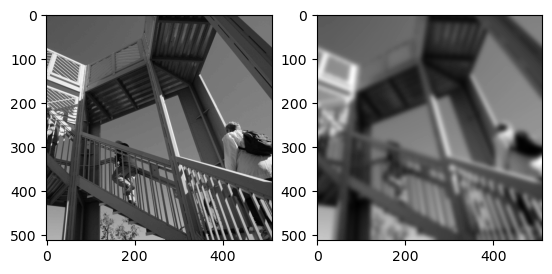

In [5]:
from scipy import datasets
import matplotlib.pyplot as plt
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = datasets.ascent()
result = gaussian_filter(ascent, sigma=5)
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()

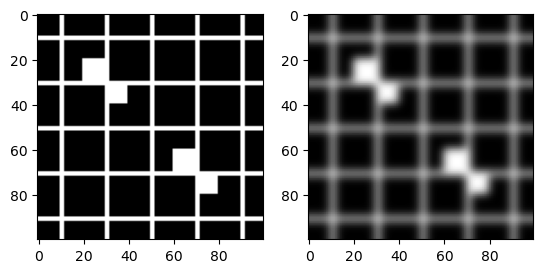

In [12]:
from scipy.ndimage import gaussian_filter

def create_circuit_pattern(size=(100, 100)):
    """Generate a simplified circuit pattern."""
    pattern = np.zeros(size)

    # Draw horizontal and vertical lines to represent wires
    for i in range(10, size[0], 20):
        pattern[i:i+2, :] = 1  # Horizontal lines
        pattern[:, i:i+2] = 1  # Vertical lines
    
    # Draw rectangles to represent components like transistors or capacitors
    for i in range(20, size[0]-20, 40):
        pattern[i:i+10, i:i+10] = 1  # Component 1
        pattern[size[0]-i-10:size[0]-i, size[1]-i-10:size[1]-i] = 1  # Component 2
    
    # Add vias (connections between layers) as small circles
    for i in range(25, size[0]-25, 50):
        y, x = np.ogrid[-i:size[0]-i, -i:size[1]-i]
        mask = x**2 + y**2 <= 25
        pattern[mask] = 1
    return pattern

import matplotlib.pyplot as plt
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = create_circuit_pattern()
result = gaussian_filter(ascent, sigma=2)
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()

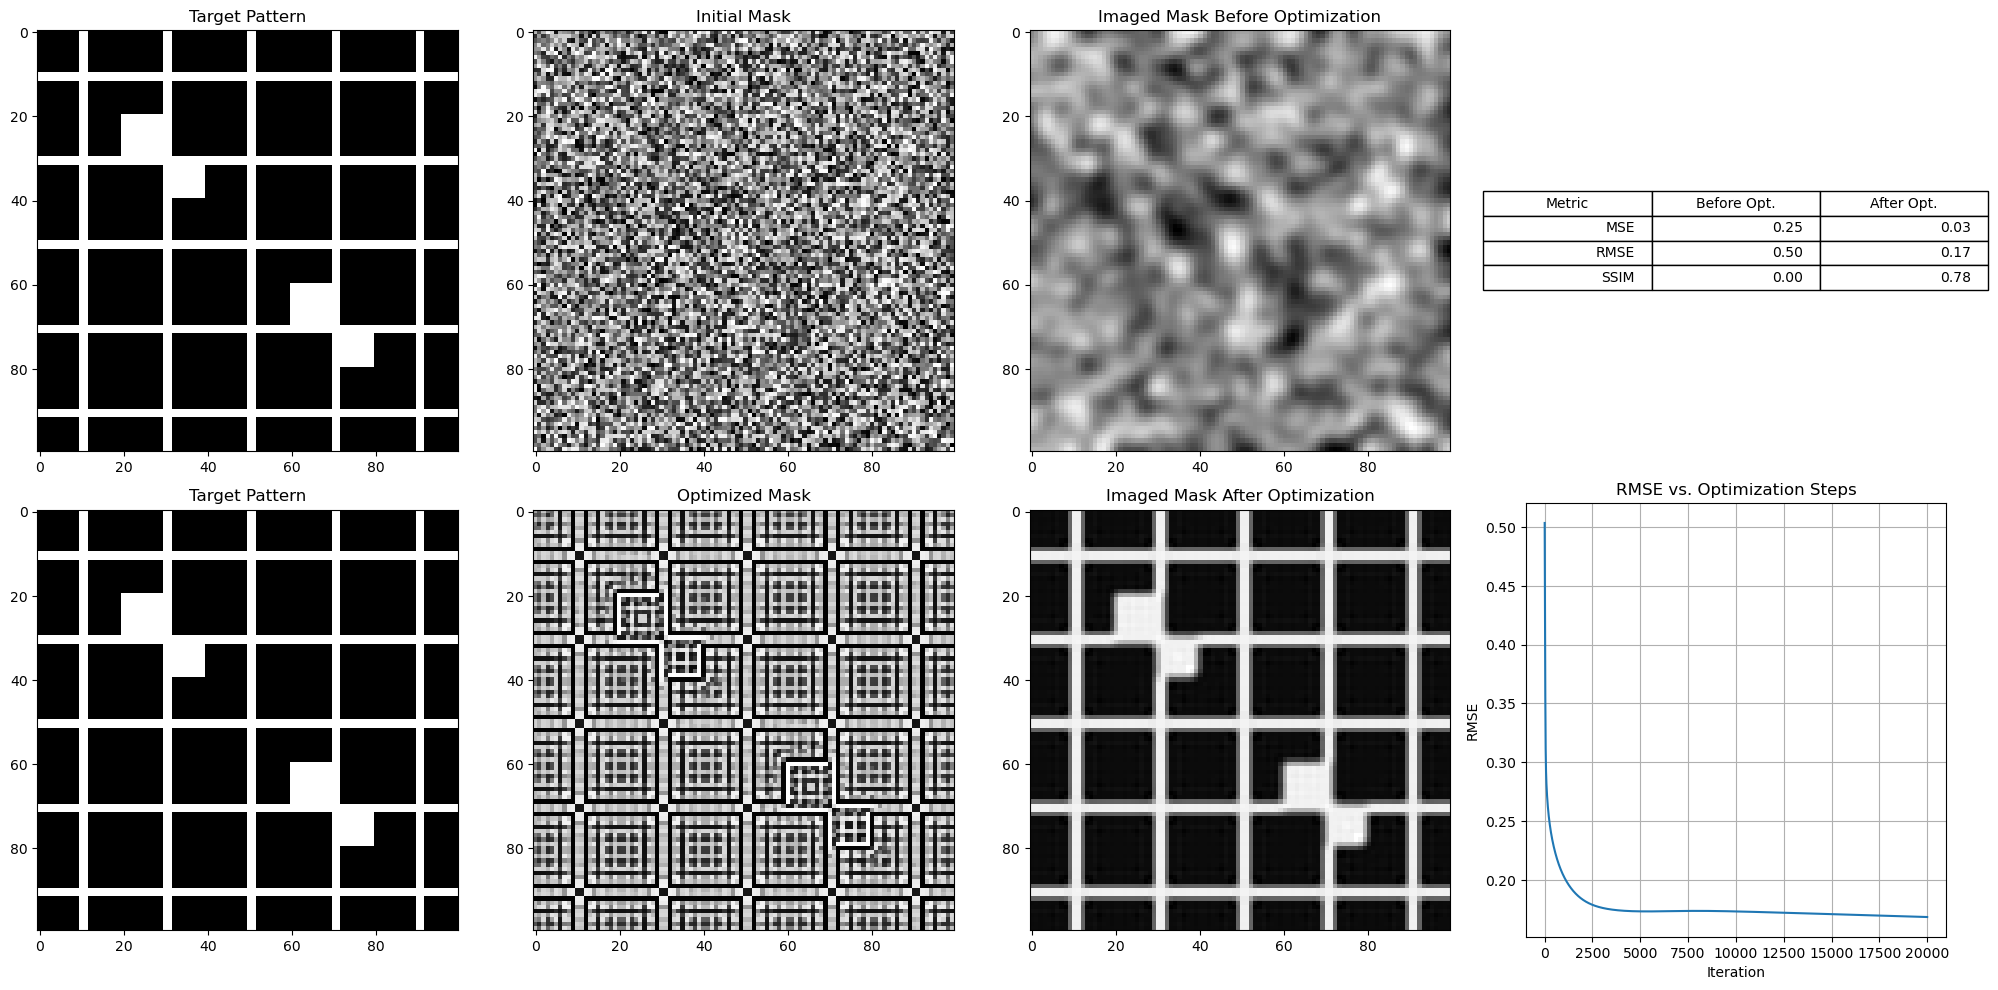

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage.metrics import mean_squared_error, structural_similarity

def calculate_mse(target, imaged):
    return mean_squared_error(target, imaged)

def calculate_rmse(target, imaged):
    mse = calculate_mse(target, imaged)
    return np.sqrt(mse)

def calculate_ssim(target, imaged):
    return structural_similarity(target, imaged, data_range=imaged.max() - imaged.min())

def create_square(size=(100, 100), square_size=20):
    """Create a simple square pattern."""
    target = np.zeros(size)
    start = size[0]//2 - square_size//2
    end = start + square_size
    target[start:end, start:end] = 1
    return target

def create_circle(size=(100, 100), radius=20):
    """Create a simple circle pattern."""
    target = np.zeros(size)
    Y, X = np.ogrid[:size[0], :size[1]]
    dist_from_center = np.sqrt((X - size[1]//2)**2 + (Y-size[0]//2)**2)
    mask = dist_from_center <= radius
    target[mask] = 1
    return target

def create_checkerboard(size=(100, 100), cell_size=10):
    """Create a checkerboard pattern."""
    target = np.zeros(size)
    for y in range(0, size[0], cell_size*2):
        for x in range(0, size[1], cell_size*2):
            target[y:y+cell_size, x:x+cell_size] = 1
            target[y+cell_size:y+cell_size*2, x+cell_size:x+cell_size*2] = 1
    return target

def create_spiral(size=(100, 100), spacing=5):
    """Create a spiral pattern - a more complex example."""
    target = np.zeros(size)
    np.fill_diagonal(target, 1)
    return target

def create_fractal(size=(100, 100)):
    """Create a fractal pattern - Sierpiński triangle as a placeholder."""
    target = np.zeros(size)
    target[30:70, 30:70] = 1
    return target

def create_circuit_pattern(size=(100, 100)):
    """Generate a simplified circuit pattern."""
    pattern = np.zeros(size)

    # Draw horizontal and vertical lines to represent wires
    for i in range(10, size[0], 20):
        pattern[i:i+2, :] = 1  # Horizontal lines
        pattern[:, i:i+2] = 1  # Vertical lines
    
    # Draw rectangles to represent components like transistors or capacitors
    for i in range(20, size[0]-20, 40):
        pattern[i:i+10, i:i+10] = 1  # Component 1
        pattern[size[0]-i-10:size[0]-i, size[1]-i-10:size[1]-i] = 1  # Component 2
    
    # Add vias (connections between layers) as small circles
    for i in range(25, size[0]-25, 50):
        y, x = np.ogrid[-i:size[0]-i, -i:size[1]-i]
        mask = x**2 + y**2 <= 25
        pattern[mask] = 1
    return pattern
#############################################################

# Forward model simulating the imaging process
def forward_model(mask, psf_sigma=2.0):
    return gaussian_filter(mask, sigma=psf_sigma)

# Adam optimization step
def adam_step(t, m, v, grad, lr=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * (grad ** 2)
    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)
    step = lr * m_hat / (np.sqrt(v_hat) + epsilon)
    return step, m, v

# ILT process using Adam optimizer
def adam_ilt(target, psf_sigma=2.0, lr=0.01, iterations=500):
    mask = np.random.rand(*target.shape)
    m, v = np.zeros_like(mask), np.zeros_like(mask)
    rmse_history = []  # To record RMSE at each step
    for i in range(1, iterations + 1):
        imaged_mask = forward_model(mask, psf_sigma)
        gradient = 2 * (imaged_mask - target)
        step, m, v = adam_step(i, m, v, gradient, lr)
        mask -= step
        # Calculate and record RMSE
        current_rmse = calculate_rmse(target, imaged_mask)
        rmse_history.append(current_rmse)
    return mask, rmse_history

# Choose a pattern
target = create_circuit_pattern()

# Initial mask before optimization
initial_mask = np.random.rand(*target.shape)
imaged_mask_before_optimization = forward_model(initial_mask, psf_sigma=2.0)

# Run the optimization
optimized_mask, rmse_history = adam_ilt(target, psf_sigma=2.0, lr=0.01, iterations=20000)
imaged_mask_after_optimization = forward_model(optimized_mask, psf_sigma=2.0)


# Calculate metrics
mse_before = calculate_mse(target, imaged_mask_before_optimization)
mse_after = calculate_mse(target, imaged_mask_after_optimization)
rmse_before = calculate_rmse(target, imaged_mask_before_optimization)
rmse_after = calculate_rmse(target, imaged_mask_after_optimization)
ssim_before = calculate_ssim(target, imaged_mask_before_optimization)
ssim_after = calculate_ssim(target, imaged_mask_after_optimization)


fig, ax = plt.subplots(2, 4, figsize=(20, 10))

ax[0, 0].imshow(target, cmap='gray')
ax[0, 0].set_title('Target Pattern')
ax[0, 1].imshow(initial_mask, cmap='gray') 
ax[0, 1].set_title('Initial Mask')
ax[0, 2].imshow(imaged_mask_before_optimization, cmap='gray')
ax[0, 2].set_title('Imaged Mask Before Optimization')
ax[1, 0].imshow(target, cmap='gray')
ax[1, 0].set_title('Target Pattern')
ax[1, 2].imshow(imaged_mask_after_optimization, cmap='gray')
ax[1, 2].set_title('Imaged Mask After Optimization')
ax[1, 1].imshow(optimized_mask, cmap='gray')
ax[1, 1].set_title('Optimized Mask')
ax[0, 0].imshow(target, cmap='gray')
ax[0, 0].set_title('Target Pattern')

# Metrics table
metrics_data = [
    ["MSE", f"{mse_before:.2f}", f"{mse_after:.2f}"],
    ["RMSE", f"{rmse_before:.2f}", f"{rmse_after:.2f}"],
    ["SSIM", f"{ssim_before:.2f}", f"{ssim_after:.2f}"]
]
column_labels = ["Metric", "Before Opt.", "After Opt."]
ax[0, 3].axis('tight')
ax[0, 3].axis('off')
table = ax[0, 3].table(cellText=metrics_data, colLabels=column_labels, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Plotting RMSE vs. Steps
ax[1, 3].plot(rmse_history, label='RMSE')
ax[1, 3].set_xlabel('Iteration')
ax[1, 3].set_ylabel('RMSE')
ax[1, 3].set_title('RMSE vs. Optimization Steps')
ax[1, 3].grid(True)

plt.tight_layout()
plt.savefig("ILT_optimization_figure_with_initial_mask.png", dpi=300)  # Saving with a new filename
plt.show()


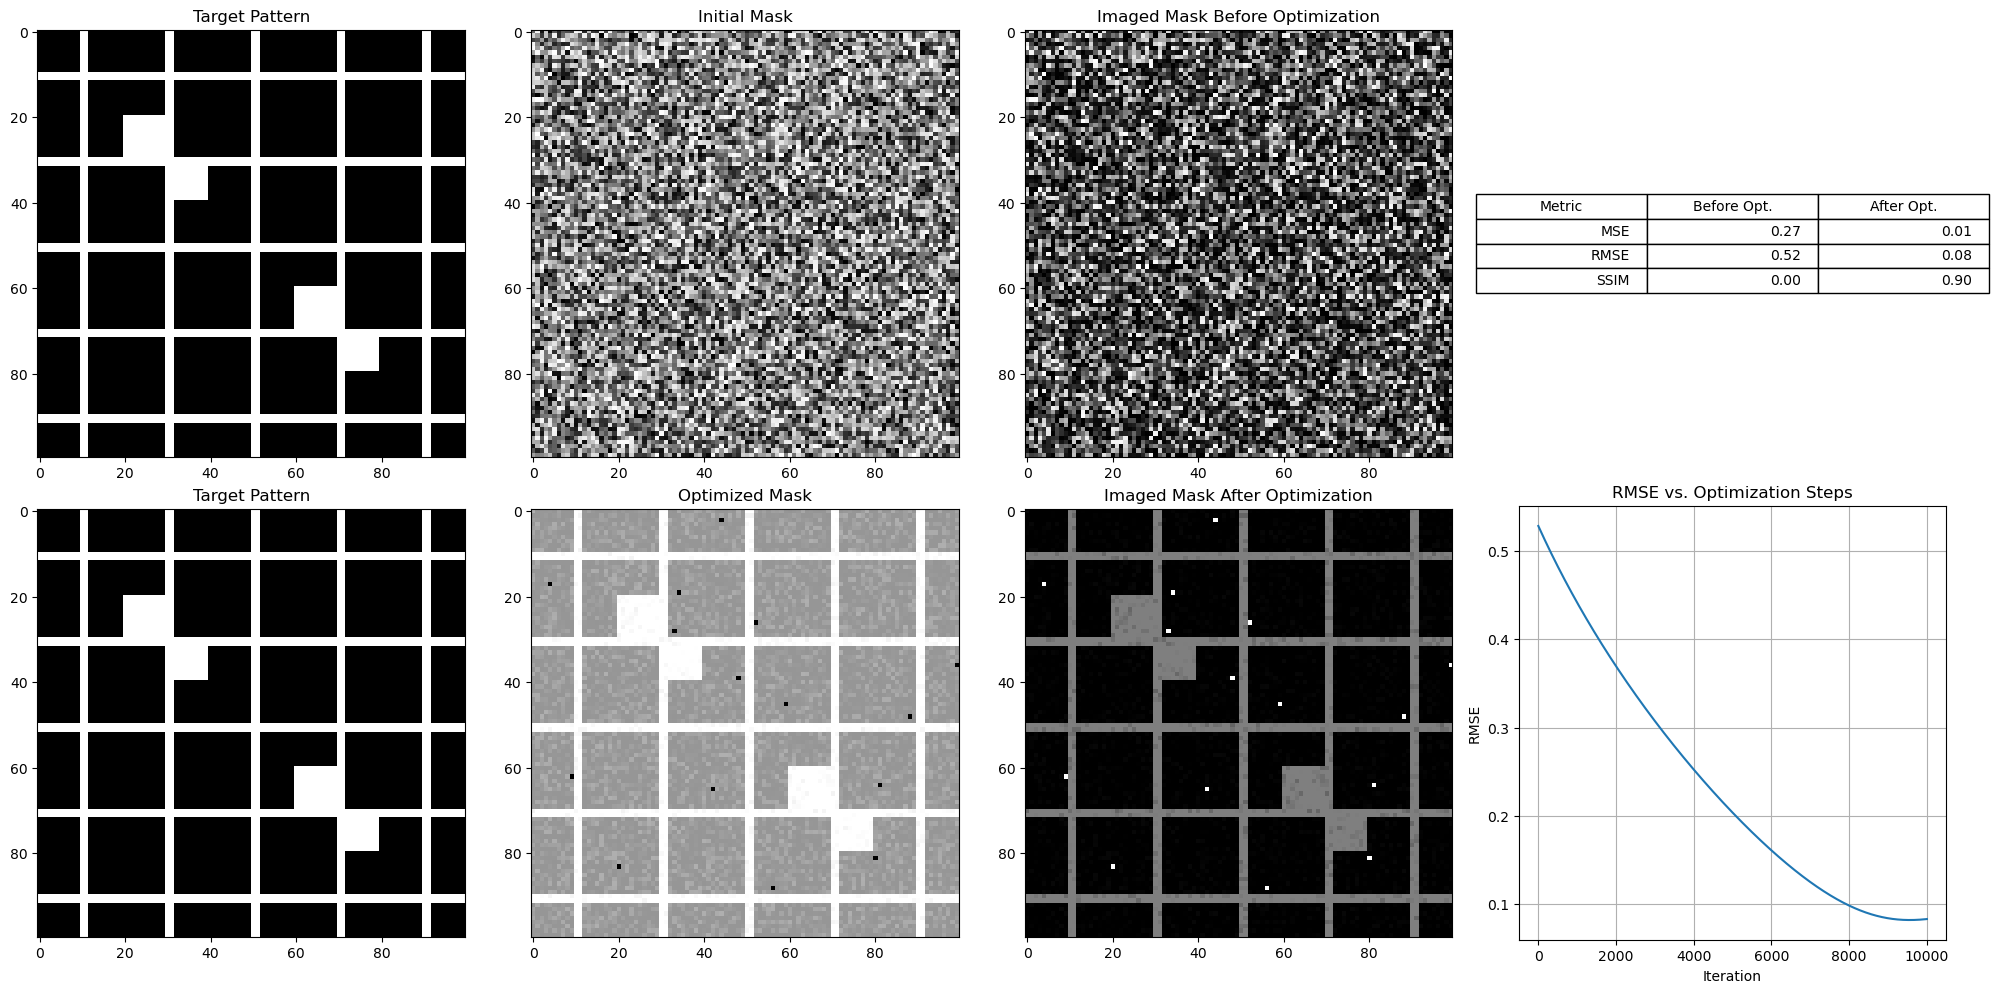

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage.metrics import mean_squared_error, structural_similarity

def calculate_mse(target, imaged):
    return mean_squared_error(target, imaged)

def calculate_rmse(target, imaged):
    mse = calculate_mse(target, imaged)
    return np.sqrt(mse)

def calculate_ssim(target, imaged):
    return structural_similarity(target, imaged, data_range=imaged.max() - imaged.min())

def create_square(size=(100, 100), square_size=20):
    """Create a simple square pattern."""
    target = np.zeros(size)
    start = size[0]//2 - square_size//2
    end = start + square_size
    target[start:end, start:end] = 1
    return target

def create_circle(size=(100, 100), radius=20):
    """Create a simple circle pattern."""
    target = np.zeros(size)
    Y, X = np.ogrid[:size[0], :size[1]]
    dist_from_center = np.sqrt((X - size[1]//2)**2 + (Y-size[0]//2)**2)
    mask = dist_from_center <= radius
    target[mask] = 1
    return target

def create_checkerboard(size=(100, 100), cell_size=10):
    """Create a checkerboard pattern."""
    target = np.zeros(size)
    for y in range(0, size[0], cell_size*2):
        for x in range(0, size[1], cell_size*2):
            target[y:y+cell_size, x:x+cell_size] = 1
            target[y+cell_size:y+cell_size*2, x+cell_size:x+cell_size*2] = 1
    return target

def create_spiral(size=(100, 100), spacing=5):
    """Create a spiral pattern - a more complex example."""
    target = np.zeros(size)
    np.fill_diagonal(target, 1)
    return target

def create_fractal(size=(100, 100)):
    """Create a fractal pattern - Sierpiński triangle as a placeholder."""
    target = np.zeros(size)
    target[30:70, 30:70] = 1
    return target

def create_circuit_pattern(size=(100, 100)):
    """Generate a simplified circuit pattern."""
    pattern = np.zeros(size)

    # Draw horizontal and vertical lines to represent wires
    for i in range(10, size[0], 20):
        pattern[i:i+2, :] = 1  # Horizontal lines
        pattern[:, i:i+2] = 1  # Vertical lines
    
    # Draw rectangles to represent components like transistors or capacitors
    for i in range(20, size[0]-20, 40):
        pattern[i:i+10, i:i+10] = 1  # Component 1
        pattern[size[0]-i-10:size[0]-i, size[1]-i-10:size[1]-i] = 1  # Component 2
    
    # Add vias (connections between layers) as small circles
    for i in range(25, size[0]-25, 50):
        y, x = np.ogrid[-i:size[0]-i, -i:size[1]-i]
        mask = x**2 + y**2 <= 25
        pattern[mask] = 1
    return pattern
#############################################################

def forward_model_diffraction(mask, wavelength=550e-9, numerical_aperture=1.4, mask_size=100, pixel_size=1e-6):
    freq_x = np.fft.fftfreq(mask_size, d=pixel_size)
    freq_y = np.fft.fftfreq(mask_size, d=pixel_size)
    fx, fy = np.meshgrid(freq_x, freq_y)
    freq_radius = np.sqrt(fx**2 + fy**2)
    
    cutoff_frequency = numerical_aperture / wavelength
    transfer_function = np.zeros_like(mask)
    transfer_function[freq_radius <= cutoff_frequency] = 1
    
    mask_fft = fftshift(fft2(ifftshift(mask)))
    image_fft = mask_fft * transfer_function
    imaged_mask = fftshift(ifft2(ifftshift(image_fft)))
    imaged_intensity = np.abs(imaged_mask)**2
    
    return imaged_intensity

# Adam optimization step
def adam_step(t, m, v, grad, lr=0.0001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * (grad ** 2)
    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)
    step = lr * m_hat / (np.sqrt(v_hat) + epsilon)
    return step, m, v

# ILT process using Adam optimizer
def adam_ilt(target, psf_sigma=2.0, lr=0.0001, iterations=10000):
    mask = np.random.rand(*target.shape)
    m, v = np.zeros_like(mask), np.zeros_like(mask)
    rmse_history = []  # To record RMSE at each step
    for i in range(1, iterations + 1):
        imaged_mask = forward_model_diffraction(mask)
        gradient = 2 * (imaged_mask - target)
        step, m, v = adam_step(i, m, v, gradient, lr)
        mask -= step
        # Calculate and record RMSE
        current_rmse = calculate_rmse(target, imaged_mask)
        rmse_history.append(current_rmse)
    return mask, rmse_history

# Choose a pattern
target = create_circuit_pattern()

# Initial mask before optimization
initial_mask = np.random.rand(*target.shape)
imaged_mask_before_optimization = forward_model_diffraction(initial_mask)

# Run the optimization
optimized_mask, rmse_history = adam_ilt(target)
imaged_mask_after_optimization = forward_model_diffraction(optimized_mask)


# Calculate metrics
mse_before = calculate_mse(target, imaged_mask_before_optimization)
mse_after = calculate_mse(target, imaged_mask_after_optimization)
rmse_before = calculate_rmse(target, imaged_mask_before_optimization)
rmse_after = calculate_rmse(target, imaged_mask_after_optimization)
ssim_before = calculate_ssim(target, imaged_mask_before_optimization)
ssim_after = calculate_ssim(target, imaged_mask_after_optimization)

fig, ax = plt.subplots(2, 4, figsize=(20, 10))

ax[0, 0].imshow(target, cmap='gray')
ax[0, 0].set_title('Target Pattern')
ax[0, 1].imshow(initial_mask, cmap='gray')  # Plotting the initial mask directly
ax[0, 1].set_title('Initial Mask')
ax[0, 2].imshow(imaged_mask_before_optimization, cmap='gray')
ax[0, 2].set_title('Imaged Mask Before Optimization')
ax[1, 0].imshow(target, cmap='gray')
ax[1, 0].set_title('Target Pattern')
ax[1, 2].imshow(imaged_mask_after_optimization, cmap='gray')
ax[1, 2].set_title('Imaged Mask After Optimization')
ax[1, 1].imshow(optimized_mask, cmap='gray')
ax[1, 1].set_title('Optimized Mask')
ax[0, 0].imshow(target, cmap='gray')
ax[0, 0].set_title('Target Pattern')

# Metrics table
metrics_data = [
    ["MSE", f"{mse_before:.2f}", f"{mse_after:.2f}"],
    ["RMSE", f"{rmse_before:.2f}", f"{rmse_after:.2f}"],
    ["SSIM", f"{ssim_before:.2f}", f"{ssim_after:.2f}"]
]
column_labels = ["Metric", "Before Opt.", "After Opt."]
ax[0, 3].axis('tight')
ax[0, 3].axis('off')
table = ax[0, 3].table(cellText=metrics_data, colLabels=column_labels, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Plotting RMSE vs. Steps
ax[1, 3].plot(rmse_history, label='RMSE')
ax[1, 3].set_xlabel('Iteration')
ax[1, 3].set_ylabel('RMSE')
ax[1, 3].set_title('RMSE vs. Optimization Steps')
ax[1, 3].grid(True)

plt.tight_layout()
plt.savefig("ILT_optimization_figure_with_initial_mask.png", dpi=300)  # Saving with a new filename
plt.show()

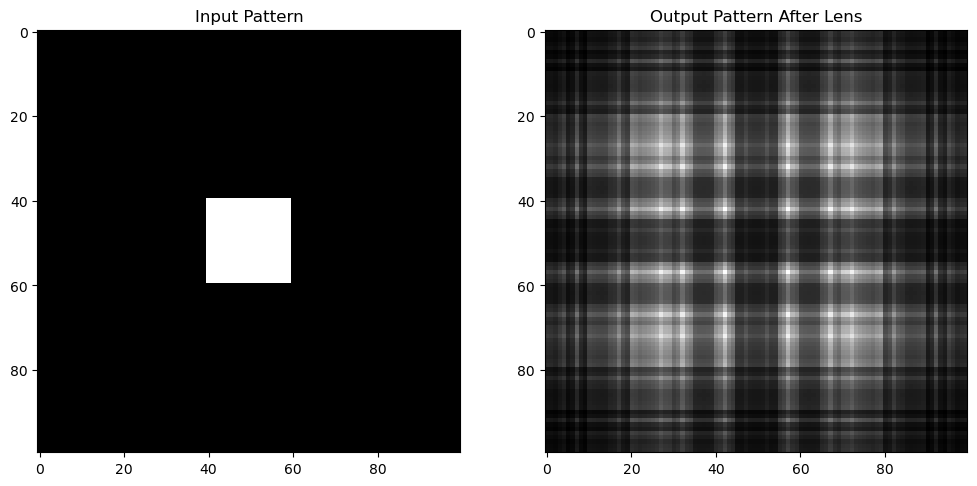

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftshift, ifftshift, fft2, ifft2

def simulate_lens_effect(input_pattern, focal_length, wavelength, pixel_size):
    # Number of pixels in input pattern
    Nx, Ny = input_pattern.shape
    
    # Create spatial frequency coordinates
    fx = np.fft.fftfreq(Nx, d=pixel_size)
    fy = np.fft.fftfreq(Ny, d=pixel_size)
    FX, FY = np.meshgrid(fx, fy)
    
    # Calculate the transfer function of the lens
    H = np.exp(-1j * np.pi * wavelength * focal_length * (FX**2 + FY**2))
    
    # Perform Fourier Transform of the input pattern
    U1 = fftshift(fft2(ifftshift(input_pattern)))
    
    # Apply the transfer function
    U2 = H * U1
    
    # Inverse Fourier Transform to get the output pattern
    output_pattern = fftshift(ifft2(ifftshift(U2)))
    
    # Return the magnitude of the complex field
    return np.abs(output_pattern)

# Example usage
size = 100  # Size of the pattern
focal_length = 0.05  # Focal length in meters
wavelength = 500e-9  # Wavelength of light in meters (500 nm)
pixel_size = 10e-6  # Pixel size in meters (10 micrometers)

# Create a simple square pattern as input
input_pattern = np.zeros((size, size))
input_pattern[size//2 - 10:size//2 + 10, size//2 - 10:size//2 + 10] = 1

# Simulate the lens effect
output_pattern = simulate_lens_effect(input_pattern, focal_length, wavelength, pixel_size)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(input_pattern, cmap='gray')
ax[0].set_title('Input Pattern')
ax[1].imshow(output_pattern, cmap='gray')
ax[1].set_title('Output Pattern After Lens')
plt.show()
